<a href="https://colab.research.google.com/github/mateozlatunic/klasifikacija-objekti-slike/blob/main/Klasifikacija_objekti_slike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

"""
------------------------ importovi ----------------------------

'import tensorflow as tf'
- Uvozi TensorFlow biblioteku, koja je popularna biblioteka otvorenog koda za strojno učenje i duboko učenje.


'from tensorflow import keras'
- Uvozi modul "keras" iz TensorFlow biblioteke. Keras je visoko-razina biblioteka za izgradnju i treniranje neuronskih mreža.


'from tensorflow.keras import layers'
 - Uvozi modul "layers" iz TensorFlow.keras paketa. Ovaj modul pruža različite slojeve neuronskih mreža koje možemo koristiti pri izgradnji modela.


'import cv2'
- Uvozi biblioteku OpenCV (Open Source Computer Vision), koja pruža funkcionalnosti za obradu slika i računalni vid.


'import numpy as np'
- Uvozi biblioteku NumPy, koja je popularna biblioteka za rad s višedimenzionalnim nizovima i matricama u Pythonu.
"""

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import numpy as np

"""
------------------------ ucitavanje cifar-10 ----------------------------

Ova linija koda učitava CIFAR-10 dataset koji se često koristi za trening i evaluaciju modela za klasifikaciju slika. Evo opisa svake linije koda:


'(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data():'
- Ova linija koda učitava CIFAR-10 dataset koristeći funkciju 'load_data()' iz Keras biblioteke. Dataset se dijeli na dva skupa podataka:
  skup za trening '(x_train, y_train)' i skup za testiranje '(x_test, y_test)'.


'x_train' i 'x_test' predstavljaju ulazne slike u obliku Numpy nizova.
'y_train' i 'y_test' predstavljaju pripadajuće oznake klasa za svaku sliku u obliku Numpy nizova.


CIFAR-10 dataset sadrži 60,000 slika podijeljenih u 10 različitih klasa, gdje svaka klasa ima 6,000 slika.
Skup za trening sadrži 50,000 slika, dok skup za testiranje sadrži preostalih 10,000 slika.
"""

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


"""
------------------------ Preprocesiranje podataka ----------------------------

Ove linije koda provode preprocesiranje podataka prije nego što se koriste za treniranje ili testiranje modela za klasifikaciju slika. Evo opisa svake linije koda:


'x_train = x_train.astype("float32") / 255.0'
- Ova linija koda pretvara vrijednosti piksela u skupu za trening (x_train) u tip float32 i normalizira ih dijeljenjem s vrijednošću 255.0.
  Normalizacija se izvodi kako bi se vrijednosti piksela dovela u raspon od 0 do 1, što olakšava učenje modelu.


'x_test = x_test.astype("float32") / 255.0'
- Ova linija koda isto što i prethodna, ali se primjenjuje na skup za testiranje '(x_test)'.


Normalizacija piksela omogućuje modelu da se lakše nosi s različitim rasponima intenziteta boja i poboljšava konvergenciju tijekom treniranja.
Korištenje tipa float32 umjesto uint8 (uobičajeni tip za slike) omogućuje preciznije računanje s vrijednostima piksela.
"""

In [3]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

"""
------------------------ Definiranje image classification ----------------------------
Ove linije koda definiraju model za klasifikaciju slika. Evo opisa svake linije koda:

'image_classification_model = keras.Sequential([...])'
- Ova linija koda stvara instancu sekvencijalnog modela image_classification_model pomoću 'Sequential' klase iz Keras biblioteke.
  Sekvencijalni model je osnovni model koji se sastoji od niza slojeva koji se izvršavaju jedan za drugim.


'keras.Input(shape=(32, 32, 3))'
- Ova linija koda definira ulazni sloj modela. Ulazni sloj očekuje slike dimenzija 32x32 piksela s 3 kanala boje (RGB).


'layers.Conv2D(32, kernel_size=(3, 3), activation="relu")'
- Ova linija koda dodaje konvolucijski sloj s 32 filtra veličine (3, 3) i aktivacijskom funkcijom ReLU.
  Konvolucijski slojevi obavljaju filtriranje slika kako bi izdvojili značajke.


'layers.MaxPooling2D(pool_size=(2, 2))'
- Ova linija koda dodaje sloj za maksimalno uzorkovanje (pooling) s faktorom uzorkovanja (2, 2).
  Sloj za maksimalno uzorkovanje smanjuje prostornu dimenzionalnost značajki.


'layers.Flatten()'
- Ova linija koda dodaje sloj za ravnjanje (flatten). Sloj ravnjanja pretvara višedimenzionalne značajke u jednodimenzionalni vektor.


'layers.Dropout(0.5)'
- Ova linija koda dodaje sloj za izbacivanje (dropout) s vjerojatnošću izbacivanja od 0.5.
  Sloj izbacivanja služi za regularizaciju modela tako da slučajno isključuje određeni postotak ulaznih jedinica tijekom treninga,
  čime se sprječava pretjerano prilagođavanje.


'layers.Dense(10, activation="softmax")'
- Ova linija koda dodaje potpuno povezani (dense) sloj s 10 izlaznih jedinica i aktivacijskom funkcijom softmax.
  Sloj potpuno povezan obavlja klasifikaciju slika i generira vjerojatnost pripadnosti svakoj od 10 mogućih klasa.

Ovaj model koristi kombinaciju konvolucijskih slojeva, slojeva za uzorkovanje, ravnjanja,
izbacivanja i potpuno povezanog sloja kako bi izgradio arhitekturu za klasifikaciju slika.
"""

In [4]:
image_classification_model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(10, activation="softmax"),
    ]
)

"""
------------------------ Kompajliranje image classification modela ------------------------

Ova linija koda kompajlira image classification model, tj. postavlja parametre potrebne za treniranje modela. Evo opisa svake linije koda:

'image_classification_model.compile([...])'
- Ova linija koda postavlja konfiguraciju modela pomoću metode compile().

'loss="sparse_categorical_crossentropy"'
- Ova linija koda postavlja gubitak (loss) modela na "sparse_categorical_crossentropy". Gubitak je funkcija koju model minimizira tijekom treninga kako bi se prilagodio podacima.
  U ovom slučaju, koristi se "sparse_categorical_crossentropy" gubitak jer su oznake klasa predstavljene kao cjelobrojni indeksi.

'optimizer="adam"'
- Ova linija koda postavlja optimizator modela na "adam". Optimizator je algoritam koji optimizira parametre modela tijekom treninga.
  "Adam" je popularni optimizator koji kombinira ideje iz stohastičkog gradijentnog spusta (SGD) i drugih metoda optimizacije.

'metrics=["accuracy"]'
- Ova linija koda postavlja metriku za evaluaciju modela na "accuracy". Metrika "accuracy" mjeri točnost modela,
  odnosno omjer točno klasificiranih uzoraka prema ukupnom broju uzoraka. Cilj je maksimizirati točnost modela tijekom treninga.

Kompajliranje modela postavlja njegove parametre za treniranje, uključujući gubitak, optimizator i metriku.
"""

In [5]:
image_classification_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

"""
Ovaj kod koristi metodu fit() na image classification modelu kako bi se model trenirao na skupu podataka.

Evo što radi svaki argument:

* x_train: Ulazni podaci za treniranje modela. To su slike koje će se koristiti za treniranje.

* y_train: Ciljne vrijednosti za treniranje modela. To su oznake (labeli) koji odgovaraju  svakoj slici u x_train i označavaju kojoj klasi slika pripada.

* batch_size: Veličina paketa (batch size) koji će se koristiti tijekom treniranja. Treniranje modela se obično vrši na malim podskupovima (paketi) podataka kako bi se smanjio utrošak memorije i poboljšala efikasnost treniranja. U ovom slučaju, koristi se paket veličine 64.

* epochs: Broj epoha (iteracija) kroz skup podataka koje će se koristiti za treniranje modela. Jedna epoha znači da će se svi podaci koristiti jednom za treniranje modela. U ovom slučaju, koristi se 10 epoha.

* validation_split: Razdjela podataka za provjeru valjanosti (validation). Ovaj argument određuje udio podataka koji će se koristiti za provjeru valjanosti modela tijekom treniranja. U ovom slučaju, 10% podataka se koristi za provjeru valjanosti.

Kada se ovaj kod izvrši, image classification model će biti treniran na skupu podataka x_train i y_train. Tijekom treniranja, model će se prilagođavati podacima kako bi naučio odgovarajuće značajke i veze između ulaznih slika i ciljnih vrijednosti. Nakon završetka treniranja, model će biti sposoban za klasifikaciju novih, nepoznatih slika.

"""

In [6]:
image_classification_model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=10,
    validation_split=0.1
)

Epoch 1/10
704/704 [==============================] - 65s 90ms/step - loss: 1.6510 - accuracy: 0.4060 - val_loss: 1.3491 - val_accuracy: 0.5248
Epoch 2/10
704/704 [==============================] - 61s 87ms/step - loss: 1.3369 - accuracy: 0.5308 - val_loss: 1.2585 - val_accuracy: 0.5504
Epoch 3/10
704/704 [==============================] - 62s 89ms/step - loss: 1.2254 - accuracy: 0.5722 - val_loss: 1.1214 - val_accuracy: 0.6172
Epoch 4/10
704/704 [==============================] - 62s 89ms/step - loss: 1.1475 - accuracy: 0.5996 - val_loss: 1.0315 - val_accuracy: 0.6462
Epoch 5/10
704/704 [==============================] - 61s 86ms/step - loss: 1.1012 - accuracy: 0.6177 - val_loss: 0.9863 - val_accuracy: 0.6706
Epoch 6/10
704/704 [==============================] - 62s 89ms/step - loss: 1.0619 - accuracy: 0.6305 - val_loss: 0.9835 - val_accuracy: 0.6746
Epoch 7/10
704/704 [==============================] - 63s 90ms/step - loss: 1.0364 - accuracy: 0.6419 - val_loss: 0.9545 - val_accuracy:

"""
Ovaj kod koristi OpenCV biblioteku (cv2) kako bi se učitao YOLOv4 model za detekciju objekata.

Evo što radi svaki argument:

* "yolov4.cfg": Putanja do konfiguracijske datoteke modela. Konfiguracijska datoteka definira arhitekturu modela, slojeve, hiperparametre i postavke za detekciju objekata.
* "yolov4.weights": Putanja do težinskih datoteka modela. Težinske datoteke sadrže naučene parametre modela koji su dobiveni treniranjem na velikom skupu podataka.

Kada se ovaj kod izvrši, cv2.dnn.readNetFromDarknet() funkcija će učitati YOLOv4 model. Konfiguracijska datoteka i težinske datoteke modela moraju biti prisutne na odgovarajućim putanjama kako bi se model uspješno učitao.

Nakon učitavanja, net objekt će predstavljati YOLOv4 model spremni za korištenje za detekciju objekata na slikama.

"""

In [7]:
net = cv2.dnn.readNetFromDarknet("yolov4.cfg", "yolov4.weights")

"""
Ovaj kod koristi OpenCV biblioteku (cv2) za čitanje slike "plane.jpg" s diska i spremanje te slike u varijablu "image".

Evo što radi svaki argument:

* 'plane.jpg': Ime ili putanja do slike koju želimo učitati.

Kada se ovaj kod izvrši, cv2.imread() funkcija će učitati sliku "plane.jpg" s diska. Slika se čita kao višedimenzionalni NumPy niz, gdje svaki element predstavlja boju piksela na odgovarajućoj poziciji u slici.

Nakon izvršenja ovog koda, varijabla "image" će sadržavati učitanu sliku, koja se može koristiti za daljnju obradu ili prikazivanje.

"""

In [8]:
image = cv2.imread('plane.jpg')

"""
Ovaj kod koristi učitani YOLOv4 model kako bi se izvršila detekcija objekata na slici.

Evo što radi svaki korak:

* blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False): Funkcija cv2.dnn.blobFromImage() pretvara ulaznu sliku (image) u format koji je prikladan za ulaz u neuronsku mrežu. Slika se skalira i normalizira, te se pretvara u blob (višedimenzionalni NumPy niz). Argumenti funkcije određuju faktor skaliranja boje, veličinu ulazne slike, zamjenu redoslijeda boja (swapRB=True znači zamjena redoslijeda kanala boje s RGB na BGR) i opciju obrezivanja slike.

* net.setInput(blob): Postavlja se ulazni blob na YOLOv4 model pomoću setInput() metode. Ovo postavlja ulazne podatke za model.

* output_layers = net.getUnconnectedOutLayersNames(): Dohvaćaju se imena izlaznih slojeva (output layers) modela koji nisu povezani s drugim slojevima. Ovi slojevi sadrže predikcije detekcije objekata.

* layer_outputs = net.forward(output_layers): Izvršava se prosljeđivanje unaprijed (forward pass) kroz YOLOv4 model s odgovarajućim izlaznim slojevima. Rezultat je lista layer_outputs koja sadrži izlazne podatke iz svakog izlaznog sloja.

* boxes = [], confidences = [], class_ids = []: Inicijaliziraju se prazne liste za pohranu pronađenih okvira (boxes), pouzdanosti (confidences) i identifikatora klasa (class_ids) detektiranih objekata.

U sljedećim petljama se prolazi kroz svaki izlazni sloj i svaku detekciju objekta u svakom izlaznom sloju:

* scores = detection[5:]: Izvlače se vjerojatnosti (scores) za sve klase objekata iz detekcije.

* class_id = np.argmax(scores): Određuje se indeks klase s najvećom vjerojatnošću.

* confidence = scores[class_id]: Izvlači se vjerojatnost za detektiranu klasu.

* Ako je vjerojatnost veća od 0.5 i detektirana klasa je klasa s indeksom 2 (što je vjerojatno klasa "car" u YOLOv4 modelu):
Izračunavaju se koordinate okvira objekta (x, y, širina, visina) na temelju predikcija modela i dimenzija ulazne slike.
Koordinate okvira, pouzdanost i identifikator klase se dodaju u odgovarajuće liste.

Nakon izvršenja ovog dijela koda, liste boxes, confidences i class_ids će sadržavati informacije o detektiranim objektima, uključujući njihove okvire, pouzdanosti i identifikatore klasa.

"""

In [9]:
blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
output_layers = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers)

boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5 and class_id == 2:
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            w = int(detection[2] * image.shape[1])
            h = int(detection[3] * image.shape[0])
            x = center_x - w // 2
            y = center_y - h // 2
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

"""
Ovaj dio koda provjerava postoji li barem jedan detektirani objekt na slici. Ako postoji barem jedan objekt, slijedi sljedeći postupak:

* x, y, w, h = boxes[0]: Dohvaćaju se koordinate okvira prvog detektiranog objekta iz liste boxes.

* cropped_image = image[y:y+h, x:x+w]: Izvodi se obrezivanje originalne slike (image) prema koordinatama okvira kako bi se dobio samo dio slike koji sadrži objekt.

* resized_image = cv2.resize(cropped_image, (32, 32)): Obrezana slika se skalira na veličinu (32x32) koristeći cv2.resize() funkciju.

* img_array = tf.expand_dims(resized_image, 0): Skalirana slika se proširuje dodavanjem dodatne dimenzije na početak kako bi se pravilno oblikovala kao ulaz za model. Rezultat je NumPy niz koji predstavlja sliku.

* prediction = image_classification_model.predict(img_array): Koristi se model za klasifikaciju slika (image_classification_model) kako bi se napravila predikcija nad ulaznom slikom (img_array).

* class_name = cifar10_classes[prediction[0].argmax()]: Na temelju predikcije modela, dobiva se indeks klase s najvišom vjerojatnošću i koristi se za dohvaćanje odgovarajućeg imena klase iz liste cifar10_classes.

* print('Detected object is a', class_name): Ispisuje se poruka koja prikazuje identifikaciju detektiranog objekta.

Ako nema detektiranih objekata (nijedan okvir nije prepoznat), ispisuje se poruka "No objects detected".

"""

In [10]:
if len(boxes) > 0:
    x, y, w, h = boxes[0]
    cropped_image = image[y:y+h, x:x+w]
    resized_image = cv2.resize(cropped_image, (32, 32))
    img_array = tf.expand_dims(resized_image, 0)
    prediction = image_classification_model.predict(img_array)
    class_name = cifar10_classes[prediction[0].argmax()]
    print('Detected object is a', class_name)
else:
    print('No objects detected')

No objects detected


"""
Varijabla cifar10_classes predstavlja listu koja sadrži imena klasa za CIFAR-10 skup podataka. CIFAR-10 je popularni skup podataka koji se često koristi za zadatke klasifikacije slika. Skup podataka sastoji se od 60.000 slika podijeljenih u 10 različitih klasa, pri čemu svaka klasa ima 6.000 slika. Svaka slika ima dimenzije 32x32 piksela i pripada jednoj od sljedećih klasa:

* Airplane (zrakoplov)
* Automobile (automobil)
* Bird (ptica)
* Cat (mačka)
* Deer (jelen)
* Dog (pas)
* Frog (žaba)
* Horse (konj)
* Ship (brod)
* Truck (kamion)

Ova lista cifar10_classes koristi se u kodu kako bi se dobila ljudski čitljiva imena klasa na temelju indeksa predikcije modela. Na primjer, ako je indeks predikcije 0, odgovarajuća klasa iz liste je "airplane" (zrakoplov).

"""

In [11]:
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

"""
Varijabla yolov4_classes predstavlja listu koja sadrži imena klasa za detekciju objekata u sklopu YOLOv4 modela. YOLOv4 (You Only Look Once) je popularna arhitektura za detekciju objekata u slikama. Ova lista sadrži imena različitih klasa objekata koje je YOLOv4 model treniran da detektira.

Lista yolov4_classes uključuje širok spektar objekata koji se mogu detektirati. Neki od primjera klasa uključuju "person" (osoba), "bicycle" (bicikl), "car" (automobil), "dog" (pas), "cat" (mačka), "traffic light" (semaphore), "chair" (stolica), "table" (stol), "book" (knjiga) i mnoge druge.

Ove klase se koriste za interpretiranje rezultata detekcije objekata. Nakon što se objekti detektiraju pomoću YOLOv4 modela, identifikatori klasa se koriste za određivanje vrste objekta koji je detektiran.

"""

In [12]:
yolov4_classes = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
                  "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog",
                  "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
                  "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite",
                  "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle",
                  "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich",
                  "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa",
                  "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote",
                  "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
                  "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

"""
Varijabla classes predstavlja kombinaciju dviju lista: cifar10_classes i yolov4_classes. Ova operacija spajanja dviju lista omogućava stvaranje jedinstvene liste koja sadrži sve klase iz CIFAR-10 skupa podataka i YOLOv4 modela za detekciju objekata.

Kao rezultat, varijabla classes će sadržavati sve klase iz liste cifar10_classes i sve klase iz liste yolov4_classes. Na ovaj način, imat ćete cjelovit popis klasa koje se koriste za klasifikaciju i detekciju objekata u vašem sustavu.

"""

In [13]:
classes = cifar10_classes + yolov4_classes

"""
Varijabla class_names_dict predstavlja rječnik (dictionary) koji mapira indekse klasa na njihova odgovarajuća imena. Rječnik je konstruiran pomoću rječnikovog izraza (dictionary comprehension) koji iterira kroz indekse klasa u rasponu od 0 do duljine liste classes i dodjeljuje svakom indeksu odgovarajuće ime klase iz liste classes.

Na primjer, ako je classes = ["airplane", "car", "dog"], tada će rječnik class_names_dict biti:

```css
{
   0: "airplane",
   1: "car",
   2: "dog"
}
```
Ovaj rječnik omogućava jednostavno mapiranje indeksa na ime klase prilikom prikaza rezultata klasifikacije ili detekcije objekata. Na taj način, možete dobiti čitljivije informacije o klasama koje su identificirane ili detektirane u vašem sustavu.

"""

In [14]:
class_names_dict = {i: classes[i] for i in range(len(classes))}

"""
Ispisivanje rječnika class_names_dict na konzoli će prikazati mapiranje indeksa klasa na njihova odgovarajuća imena. Evo primjera ispisa:

Class names dictionary:
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck', 10: 'person', 11: 'bicycle', 12: 'car', 13: 'motorbike', 14: 'aeroplane', 15: 'bus', 16: 'train', 17: 'truck', 18: 'boat', 19: 'traffic light', ... }

Ovaj ispis će prikazati sve ključeve (indekse) rječnika zajedno s njihovim vrijednostima (imenima klasa) u formatu {ključ: vrijednost}.

"""

In [15]:
print("Class names dictionary:")
print(class_names_dict)

Class names dictionary:
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck', 10: 'person', 11: 'bicycle', 12: 'car', 13: 'motorbike', 14: 'aeroplane', 15: 'bus', 16: 'train', 17: 'truck', 18: 'boat', 19: 'traffic light', 20: 'fire hydrant', 21: 'stop sign', 22: 'parking meter', 23: 'bench', 24: 'bird', 25: 'cat', 26: 'dog', 27: 'horse', 28: 'sheep', 29: 'cow', 30: 'elephant', 31: 'bear', 32: 'zebra', 33: 'giraffe', 34: 'backpack', 35: 'umbrella', 36: 'handbag', 37: 'tie', 38: 'suitcase', 39: 'frisbee', 40: 'skis', 41: 'snowboard', 42: 'sports ball', 43: 'kite', 44: 'baseball bat', 45: 'baseball glove', 46: 'skateboard', 47: 'surfboard', 48: 'tennis racket', 49: 'bottle', 50: 'wine glass', 51: 'cup', 52: 'fork', 53: 'knife', 54: 'spoon', 55: 'bowl', 56: 'banana', 57: 'apple', 58: 'sandwich', 59: 'orange', 60: 'broccoli', 61: 'carrot', 62: 'hot dog', 63: 'pizza', 64: 'donut', 65: 'cake', 66: 'chair', 67: 'sofa', 68: 'pot

"""
Ovaj kod provjerava postoji li barem jedan detektirani objekt na slici. Ako je to slučaj, uzima se prvi objekt iz liste boxes koji sadrži koordinate okvira objekta (x, y, w, h). Zatim se iz originalne slike image izdvaja područje određeno tim koordinatama kako bi se dobio "iskropljeni" (cropped) objekt.

Nakon toga, iskropljeni objekt se skalira na veličinu 32x32 koristeći funkciju cv2.resize(). Dobivena slika se proširuje s jednom dimenzijom koristeći tf.expand_dims() kako bi odgovarala ulaznom obliku modela za klasifikaciju slika. Zatim se primjenjuje model image_classification_model.predict() na proširenu sliku kako bi se dobila predikcija klase objekta.

Indeks klase s najvećom vjerojatnošću se dobiva pomoću metode .argmax() na rezultatu predikcije. Ako je indeks klase manji od broja klasa u CIFAR-10 skupu podataka (len(cifar10_classes)), tada se klasa dobiva iz liste cifar10_classes, inače se dobiva iz liste yolov4_classes ovisno o indeksu.

Napokon, ispisuje se prepoznati objekt na slici, odnosno ispisuje se njegova klasa. Ako nije detektiran nijedan objekt na slici, ispisuje se poruka "No objects detected".

"""

In [16]:
if len(boxes) > 0:
    x, y, w, h = boxes[0]
    cropped_image = image[y:y+h, x:x+w]
    resized_image = cv2.resize(cropped_image, (32, 32))
    img_array = tf.expand_dims(resized_image, 0)
    prediction = image_classification_model.predict(img_array)
    class_index = prediction[0].argmax()
    if class_index < len(cifar10_classes):
        class_name = cifar10_classes[class_index]
    else:
        class_name = yolov4_classes[class_index - len(cifar10_classes)]
    print('Detected object is a', class_name)
else:
    print('No objects detected')

No objects detected


In [17]:
"""
blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False): Ovaj redak stvara blob (binarni veliki objekt) iz ulazne slike.
Blob je unaprijed obrađena slika koja služi kao ulaz u duboku neuronsku mrežu (DNN).
Ovdje je slika ulazna slika, 1/255 je faktor skale primijenjen za normalizaciju vrijednosti piksela između 0 i 1, (416, 416) predstavlja veličinu Bloba,
swapRB=True označava da crveni i plavi kanali trebaju biti zamijenjeni,
a crop=False navodi da se slika ne smije izrezati.
'net.setInput(blob)': Ovaj redak postavlja blob kao ulaz u neuronsku mrežu.
'output_layers = net.getUnconnectedOutLayersNames()': Dobivaju nazivi izlaznih slojeva neuronske mreže. Ovi slojevi obično sadrže konačna predviđanja.
layer_outputs = net.forward(output_layers): neuronska mreža se propagira naprijed pomoću ulaznog Blob-a, a rezultati izlaznih slojeva pohranjuju se u varijablu layer_outputs.
Svaki element layer_outputs odgovara izlazu jednog od izlaznih slojeva.
'boxes = [], confidences = [], class_ids = []': Ovi prazni popisi koristit će se za pohranjivanje otkrivenih graničnih okvira,
njihovih odgovarajućih pouzdanosti i predviđenih ID-ova klasa.
Sljedeći dio koda prolazi kroz svaki element u layer_outputs i dalje obrađuje otkrivene objekte:
  -'for output in layer_outputs': Prođite kroz elemente u layer_outputs.
  -'for detection in output': Prolazi kroz detekcije unutar svakog izlaznog elementa.
  -'scores = detection[5:]': Izdvaja rezultate za svaku klasu iz otkrivanja. Indeks 5 se koristi budući da prvih 5 elemenata sadrži druge informacije poput koordinata i dimenzija graničnog okvira.
  -'class_id = np.argmax(scores)': Pronalaženje klase s najvišim rezultatom koristeći np.argmax, koji vraća indeks maksimalne vrijednosti u nizu 'scores'.
  -'confidence = scores[class_id': Dohvaća ocjenu pouzdanosti za 'score' s najvećim bodovanjem.
  -'if confidence > 0.5': Provjerava da li je pouzdanost iznad određenog praga (u ovom slučaju 0,5) da bih se smatrala valjanom detekcijom.
"""
blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
output_layers = net.getUnconnectedOutLayersNames()
layer_outputs = net.forward(output_layers)

boxes = []
confidences = []
class_ids = []

for output in layer_outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * image.shape[1])
            center_y = int(detection[1] * image.shape[0])
            w = int(detection[2] * image.shape[1])
            h = int(detection[3] * image.shape[0])
            x = center_x - w // 2
            y = center_y - h // 2
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

"""
Inicijalizira prazan popis pod nazivom detected_classes za pohranjivanje imena otkrivenih klasa.
Zatim ponavlja svaki granični okvir na popisu okvira koji sadrži koordinate otkrivenih objekata.
Za svaki granični okvir izdvaja područje interesa "Region of interest"(ROI) iz izvorne slike pomoću koordinata okvira.
Veličina izdvojenog ROI-ja mijenja se na fiksnu veličinu od 32x32 piksela.
Slika promijenjene veličine prolazi kroz model klasifikacije slike kako bi se dobilo predviđanje za klasu objekta.
Predviđena klasa se određuje pronalaženjem indeksa s najvećom predviđenom vjerojatnošću i njegovim preslikavanjem u odgovarajući naziv klase pomoću popisa klasa.
Otkriveni naziv klase dodaje se popisu detected_classes.
Indeks i odgovarajući naziv klase otkrivenog objekta ispisuju se na konzoli.
Na kraju, ako nije bilo graničnih okvira (tj. nisu otkriveni objekti), ispisuje se poruka 'Nema detektiranih objekata'.
"""

In [18]:
detected_classes = []
for i, box in enumerate(boxes):
    x, y, w, h = box
    cropped_image = image[y:y+h, x:x+w]
    resized_image = cv2.resize(cropped_image, (32, 32))
    img_array = tf.expand_dims(resized_image, 0)
    prediction = image_classification_model.predict(img_array)
    class_name = classes[prediction[0].argmax()]
    detected_classes.append(class_name)
    print(f"Detektirani objekti {i+1} is a {class_name}")

if len(boxes) == 0:
    print('Nema detektiranih objekata')

1/1 [==============================] - 0s 119ms/step
Detektirani objekti 1 is a airplane
1/1 [==============================] - 0s 22ms/step
Detektirani objekti 2 is a airplane
1/1 [==============================] - 0s 21ms/step
Detektirani objekti 3 is a airplane
1/1 [==============================] - 0s 21ms/step
Detektirani objekti 4 is a airplane


"""
Redak iz google.colab.patches import cv2_imshow posebno se koristi u okruženju Google Colaboratory (Colab). Uvozi funkciju cv2_imshow iz modula google.colab.patches.
"""

In [19]:
from google.colab.patches import cv2_imshow

1/1 [==============================] - 0s 22ms/step


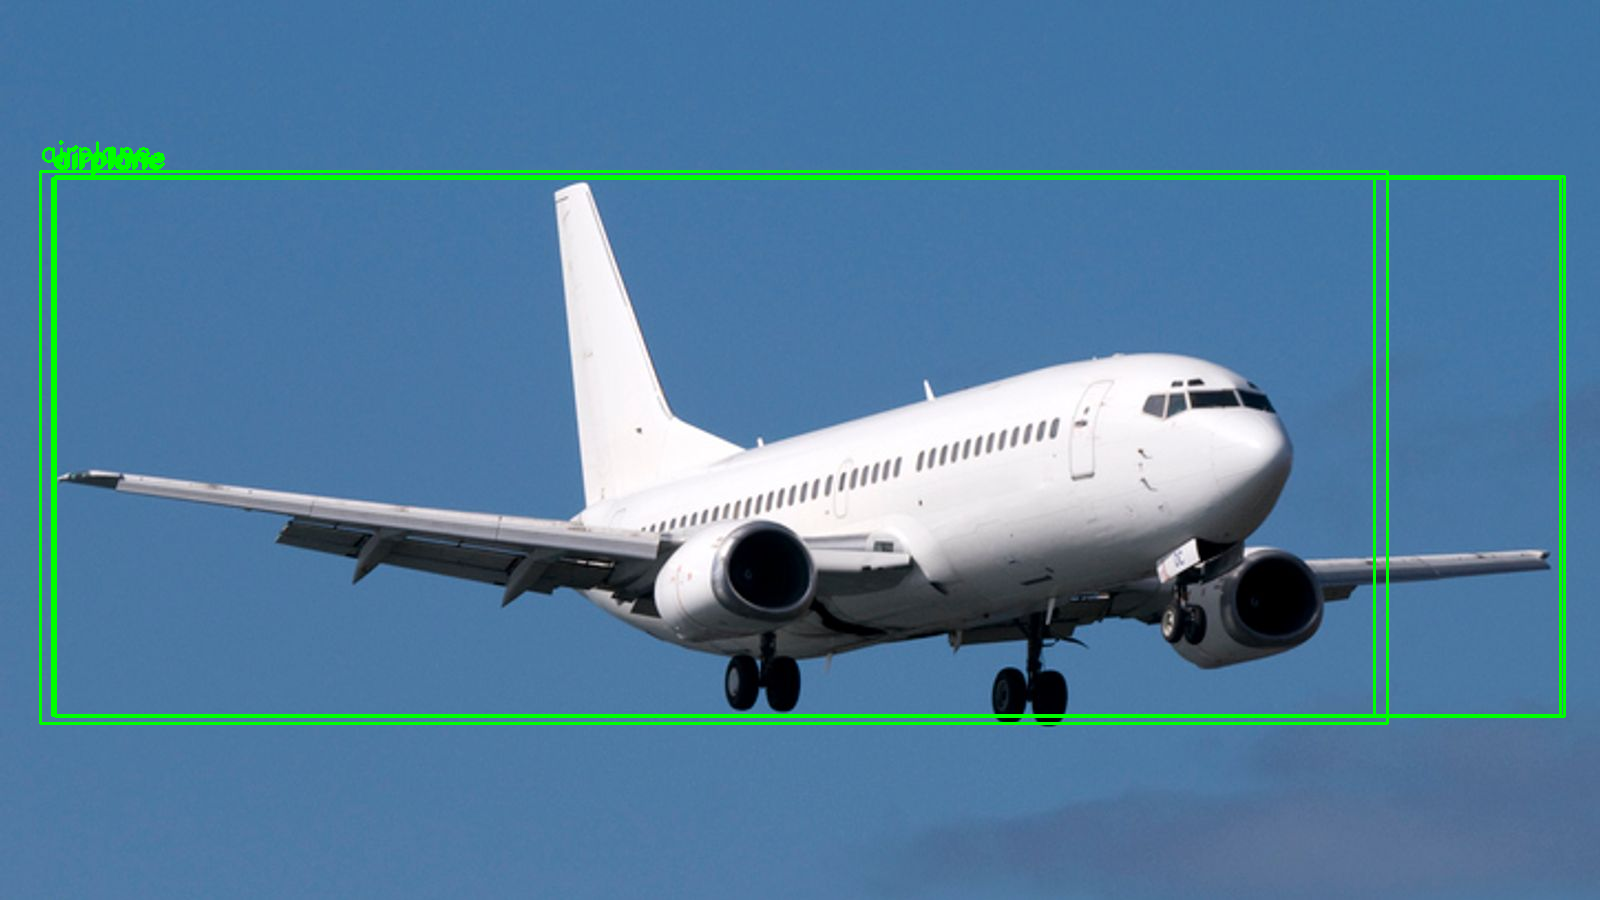

In [20]:
"""
'x, y, w, h = box': koordinate i dimenzije trenutnog graničnog okvira raspakiraju se u zasebne varijable, kao što smo vidjeli ranije.
'cropped_image = image[y:y+h, x:x+w]': Ova linija izvlači područje interesa (ROI) iz izvorne slike na temelju koordinata graničnog okvira
'img_array = tf.expand_dims(resized_image, 0)': Slika promijenjene veličine proširena je kako bi uključila dodatnu dimenziju na indeksu 0.
Sljedeće linije odgovorne su za vizualizaciju otkrivenih objekata na izvornoj slici:
  -'cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)': Ovo crta pravokutnik oko otkrivenog objekta na slici koristeći koordinate graničnog okvira (x, y) i (x+w, y+h). Pravokutnik je zelene (0, 255, 0) boje i debljine 2.
  -'cv2.putText(image, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)': Time se na sliku stavlja tekst koji označava naziv klase otkrivenog objekta. Tekst se nalazi malo iznad gornjeg lijevog kuta koordinata graničnog okvira (x, y-10).
    Korišteni font je cv2.FONT_HERSHEY_SIMPLEX s veličinom fonta 0,9. Tekst je zelene (0, 255, 0) boje debljine 2.
Ukratko, ovaj segment proširenog koda izvodi otkrivanje i klasifikaciju objekata,
dodaje otkrivene nazive klasa na popis i vizualizira otkrivene objekte na izvornoj slici crtanjem graničnih okvira i tekstualnih komentara.
"""
detected_classes = []
for i, box in enumerate(boxes):
    x, y, w, h = box
    cropped_image = image[y:y+h, x:x+w]
    resized_image = cv2.resize(cropped_image, (32, 32))
    img_array = tf.expand_dims(resized_image, 0)
    prediction = image_classification_model.predict(img_array)
    class_name = classes[prediction[0].argmax()]
    detected_classes.append(class_name)

    # Crtanje box-a za objekte
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(image, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

if len(boxes) == 0:
    print('No objects detected')

# Prikaz slike sa detektiranim objektima
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
"""
'(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()': Ovaj redak učitava skup podataka CIFAR-10 pomoću funkcije load_data() tvrtke Keras. Dijeli skup podataka na skupove za obuku i testiranje, pridjeljujući značajke (slike) x_train i x_test, te odgovarajuće oznake y_train i y_test.
'x_test = x_test.astype("float32") / 255.0': Ovaj redak pretvara vrijednosti piksela x_test podataka iz cijelih brojeva u float i normalizira ih između 0 i 1. Dijeljenjem s 255,0, svaka vrijednost piksela skalira se na raspon od 0 do 1, pod pretpostavkom da su izvorne vrijednosti piksela bile u rasponu od 0 do 255.
'loss, accuracy = image_classification_model.evaluate(x_test, y_test)': Ovaj redak procjenjuje model klasifikacije slike pomoću skupa za testiranje x_test i y_test. Metoda evaluate() izračunava gubitak i točnost predviđanja modela na testnim podacima.
'print("Image Classification Model - Evaluacija:")': Ispisuje zaglavlje koje označava sljedeće rezultate procjene.
Ukratko, ovaj segment koda učitava skup podataka CIFAR-10, priprema testne podatke tako što ih normalizira, ocjenjuje izvedbu modela klasifikacije slike pomoću testnih podataka i na kraju ispisuje izračunate vrijednosti gubitka i točnosti.
"""
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_test = x_test.astype("float32") / 255.0

loss, accuracy = image_classification_model.evaluate(x_test, y_test)
print("Image Classification Model - Evaluacija:")
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 4s 12ms/step - loss: 0.9059 - accuracy: 0.6904
Image Classification Model - Evaluacija:
Loss: 0.9058836698532104
Accuracy: 0.6904000043869019


In [22]:
"""
'num_objects_detected = len(boxes)': Ova linija izračunava broj otkrivenih objekata dobivanjem duljine popisa okvira koji sadrži koordinate graničnog okvira otkrivenih objekata.
Sljedeći redovi koriste petlju za ponavljanje preko svakog graničnog okvira na popisu okvira:
  -'for i, box in enumerate(boxes)': Koristi funkciju enumerate() za iteraciju po popisu okvira, pružajući i indeks (i) i koordinate okvira (box).
  -'x, y, w, h = box': Koordinate i dimenzije trenutnog graničnog okvira raspakiraju se u zasebne varijable.
  -'confidence = confidences[i] * 100': Ocjena pouzdanosti trenutno otkrivenog objekta izračunava se množenjem odgovarajuće vrijednosti pouzdanosti s popisa pouzdanosti (na skali između 0 i 1) sa 100 kako bi se pretvorila u postotak.
  -'class_name = classes[class_ids[i]]': Naziv klase trenutno otkrivenog objekta dobiva se korištenjem popisa class_ids za dohvaćanje indeksa, koji se zatim koristi za pristup odgovarajućem nazivu klase s popisa klasa.
"""
num_objects_detected = len(boxes)
print("Object Detection Model - Evaluacija:")
print("Broj detektiranih objekata:", num_objects_detected)

for i, box in enumerate(boxes):
    x, y, w, h = box
    confidence = confidences[i] * 100
    class_name = classes[class_ids[i]]

    print(f"Detektirani objekti {i+1}: (confidence: {confidence}%)")

Object Detection Model - Evaluacija:
Broj detektiranih objekata: 4
Detektirani objekti 1: (confidence: 78.49041223526001%)
Detektirani objekti 2: (confidence: 72.84553647041321%)
Detektirani objekti 3: (confidence: 99.33977723121643%)
Detektirani objekti 4: (confidence: 99.21432137489319%)


In [ ]:
################################################################################################################################################################################



*   Ova funkcija detect_objects uzima sliku kao ulaz.
* Stvara blob iz slike pomoću funkcije cv2.dnn.blobFromImage. Blob je unaprijed obrađena slika koja se koristi kao ulaz u duboku neuronsku mrežu (DNN) za detekciju objekta.
* Slika se skalira dijeljenjem s 255 kako bi se normalizirale vrijednosti piksela između 0 i 1.
* Blob ima veličinu (416, 416) piksela.
* swapRB=True mijenja crveni i plavi kanal slike (OpenCV koristi BGR poredak umjesto RGB).
* crop=False znači da slika nije izrezana nakon promjene veličine.
* Blob je postavljen kao ulaz u neuronsku mrežu (mrežu).
* Neuronska mreža se zatim prosljeđuje naprijed kako bi se dobio izlaz u layer_outputs.
* Ovdje se liste "boxes", "confidence" i "class_id" se inicijaliziraju za pohranjivanje graničnih okvira, povjerljivosti i ID-ova klasa otkrivenih objekata.
* Kod prolazi kroz layer_outputs kako bi izvukao informacije o detekcijama.
* Class_id se određuje pronalaženjem indeksa s najvišim rezultatom pomoću np.argmax(scores).
* Pouzdanost detekcije dobiva se korištenjem confidence = scores[class_id].
* Ako je pouzdanost veća od 0,5 (threshold), kod izračunava koordinate graničnog okvira (x, y, w, h) u odnosu na dimenzije slike.
* Koordinate graničnog okvira, pouzdanost i ID klase dodaju se odgovarajućim listama (boxes, confidences, class_ids).
* detected_classes inicijalizira se kao prazna lista za pohranjivanje naziva klasa otkrivenih objekata.
* Kod prolazi kroz box list i izdvaja koordinate svakog graničnog okvira (x, y, w, h).
* Odgovarajuće područje interesa (ROI) izrezano je iz izvorne slike.
* Izrezana slika mijenja se u veličinu (32, 32) piksela pomoću cv2.resize
* Slika promijenjene veličine pretvara se u polje i proširuje duž prve dimenzije pomoću tf.expand_dims kako bi odgovarala očekivanom ulaznom obliku modela klasifikacije slike.
* Niz slika unosi se u image_classification_model da bi se dobile vjerojatnosti predviđanja.
* Naziv klase koji odgovara najvećoj vjerojatnosti dohvaća se s popisa klasa korištenjem prediction[0].argmax().
* Naziv klase dodaje se popisu detected_classes i ispisuje se poruka koja označava otkriveni objekt i njegovu klasu.
* Granični okvir i naziv klase nacrtani su na slici pomoću cv2.rectangle i cv2.putText.
* Ako nema detektiranih objekata (bez kutija), ispisuje se poruka.
* Funkcija vraća označenu sliku (image) i popis otkrivenih klasa (detected_classes).





In [23]:
def detect_objects(image):
    blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    output_layers = net.getUnconnectedOutLayersNames()
    layer_outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for output in layer_outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.5:
                center_x = int(detection[0] * image.shape[1])
                center_y = int(detection[1] * image.shape[0])
                w = int(detection[2] * image.shape[1])
                h = int(detection[3] * image.shape[0])
                x = center_x - w // 2
                y = center_y - h // 2
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    detected_classes = []
    for i, box in enumerate(boxes):
        x, y, w, h = box
        cropped_image = image[y:y+h, x:x+w]
        resized_image = cv2.resize(cropped_image, (32, 32))
        img_array = tf.expand_dims(resized_image, 0)
        prediction = image_classification_model.predict(img_array)
        class_name = classes[prediction[0].argmax()]
        detected_classes.append(class_name)
        print(f"Detected object {i+1} is a {class_name}")

        cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(image, class_name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    if len(boxes) == 0:
        print('No objects detected')

    return image, detected_classes

U Google Colabu, standardna funkcija cv2.imshow koja se koristi u tradicionalnim Python okruženjima možda neće raditi kako se očekuje pri pokušaju prikazivanja slika. Umjesto toga,
* cv2_imshow pruža se kao zamjenska funkcija koja radi posebno unutar sučelja Colab bilježnice.
* Funkcija cv2_imshow uzima sliku kao ulaz i prikazuje je u izlaznoj ćeliji Colab bilježnice. On se bavi potrebnim oblikovanjem i renderiranjem slike za pravilnu vizualizaciju.

In [24]:
  from google.colab.patches import cv2_imshow

* Kod počinje iteracijom preko indeksa popisa x_train, pod pretpostavkom da x_train sadrži skup ulaznih slika.
* Unutar petlje, kod dohvaća i-tu sliku iz x_train i dodjeljuje je varijabli slike.
* Sljedeći redak pretvara prostor boja slike iz RGB u BGR pomoću cv2.cvtColor(image, cv2.COLOR_RGB2BGR). OpenCV koristi BGR (plavo-zeleno-crveno) kao zadani redoslijed kanala boja, dok mnoge druge biblioteke koriste RGB (crveno-zeleno-plavo). Ova konverzija osigurava kompatibilnost s OpenCV funkcijama.
* Slika se zatim prosljeđuje kao argument funkciji detect_objects, koja vraća označenu sliku (image) i popis otkrivenih klasa (detected_classes).
* Označena slika prikazuje se pomoću funkcije cv2_imshow, koja je posebno dizajnirana za prikaz slika u okruženju Google Colab.
* cv2.waitKey(0) čeka događaj na tipkovnici prije nego što nastavi na sljedeću iteraciju petlje. U tom slučaju čeka dok se ne pritisne tipka kako bi prozor slike ostao otvoren. Parametar 0 označava neodređeno čekanje do pritiska tipke.
* Sveukupno, ovaj kod ponavlja slike za obuku, izvodi detekciju objekta na svakoj slici i prikazuje označene slike u Google Colab okruženju jednu po jednu, čekajući pritisak na tipku za prelazak na sljedeću sliku.

No objects detected


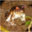

No objects detected


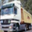

No objects detected


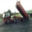

No objects detected


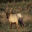

No objects detected


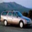

No objects detected


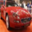

No objects detected


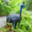

No objects detected


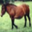

No objects detected


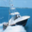

No objects detected


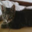

No objects detected


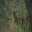

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 20ms/step
Detected object 2 is a horse
1/1 [==============================] - 0s 21ms/step
Detected object 3 is a horse
1/1 [==============================] - 0s 20ms/step
Detected object 4 is a dog
1/1 [==============================] - 0s 24ms/step
Detected object 5 is a dog


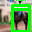

No objects detected


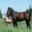

No objects detected


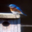

No objects detected


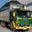

No objects detected


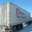

No objects detected


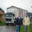

No objects detected


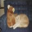

No objects detected


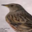

No objects detected


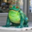

No objects detected


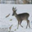

No objects detected


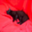

No objects detected


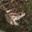

No objects detected


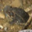

No objects detected


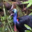

No objects detected


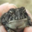

1/1 [==============================] - 0s 20ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 21ms/step
Detected object 2 is a truck


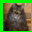

No objects detected


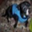

No objects detected


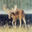

No objects detected


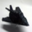

1/1 [==============================] - 0s 21ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 20ms/step
Detected object 2 is a airplane
1/1 [==============================] - 0s 21ms/step
Detected object 3 is a airplane
1/1 [==============================] - 0s 20ms/step
Detected object 4 is a airplane
1/1 [==============================] - 0s 20ms/step
Detected object 5 is a airplane


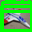

1/1 [==============================] - 0s 21ms/step
Detected object 1 is a airplane


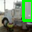

No objects detected


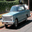

No objects detected


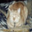

No objects detected


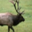

No objects detected


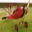

1/1 [==============================] - 0s 29ms/step
Detected object 1 is a cat


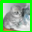

No objects detected


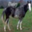

No objects detected


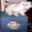

No objects detected


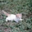

No objects detected


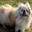

No objects detected


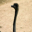

1/1 [==============================] - 0s 20ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 22ms/step
Detected object 2 is a dog
1/1 [==============================] - 0s 21ms/step
Detected object 3 is a dog


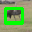

1/1 [==============================] - 0s 21ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 20ms/step
Detected object 2 is a truck


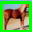

No objects detected


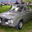

1/1 [==============================] - 0s 20ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 20ms/step
Detected object 2 is a automobile
1/1 [==============================] - 0s 21ms/step
Detected object 3 is a truck
1/1 [==============================] - 0s 22ms/step
Detected object 4 is a truck


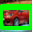

No objects detected


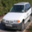

No objects detected


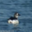

No objects detected


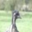

No objects detected


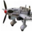

No objects detected


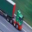

No objects detected


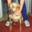

No objects detected


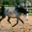

No objects detected


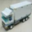

No objects detected


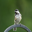

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 23ms/step
Detected object 2 is a dog
1/1 [==============================] - 0s 27ms/step
Detected object 3 is a dog


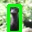

No objects detected


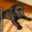

No objects detected


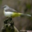

No objects detected


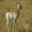

No objects detected


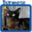

No objects detected


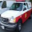

No objects detected


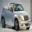

No objects detected


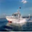

No objects detected


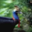

No objects detected


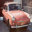

No objects detected


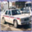

1/1 [==============================] - 0s 35ms/step
Detected object 1 is a horse


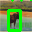

No objects detected


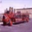

No objects detected


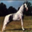

No objects detected


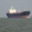

No objects detected


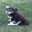

No objects detected


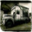

No objects detected


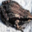

No objects detected


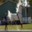

No objects detected


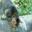

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a automobile
1/1 [==============================] - 0s 21ms/step
Detected object 2 is a dog
1/1 [==============================] - 0s 21ms/step
Detected object 3 is a horse
1/1 [==============================] - 0s 21ms/step
Detected object 4 is a horse


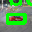

No objects detected


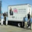

No objects detected


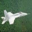

No objects detected


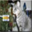

No objects detected


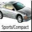

No objects detected


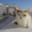

No objects detected


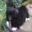

No objects detected


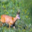

No objects detected


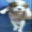

No objects detected


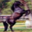

No objects detected


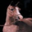

1/1 [==============================] - 0s 20ms/step
Detected object 1 is a ship
1/1 [==============================] - 0s 21ms/step
Detected object 2 is a dog


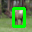

No objects detected


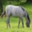

No objects detected


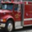

No objects detected


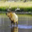

No objects detected


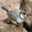

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 22ms/step
Detected object 2 is a truck


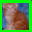

No objects detected


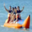

No objects detected


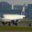

No objects detected


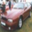

No objects detected


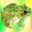

No objects detected


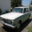

No objects detected


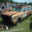

No objects detected


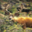

No objects detected


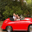

No objects detected


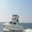

No objects detected


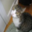

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 20ms/step
Detected object 2 is a truck


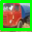

1/1 [==============================] - 0s 29ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 30ms/step
Detected object 2 is a automobile


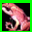

No objects detected


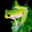

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 21ms/step
Detected object 2 is a truck
1/1 [==============================] - 0s 22ms/step
Detected object 3 is a automobile
1/1 [==============================] - 0s 25ms/step
Detected object 4 is a automobile
1/1 [==============================] - 0s 20ms/step
Detected object 5 is a automobile


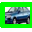

No objects detected


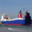

No objects detected


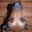

No objects detected


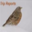

No objects detected


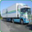

No objects detected


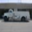

No objects detected


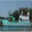

1/1 [==============================] - 0s 23ms/step
Detected object 1 is a cat
1/1 [==============================] - 0s 21ms/step
Detected object 2 is a dog
1/1 [==============================] - 0s 19ms/step
Detected object 3 is a horse
1/1 [==============================] - 0s 20ms/step
Detected object 4 is a horse
1/1 [==============================] - 0s 24ms/step
Detected object 5 is a dog
1/1 [==============================] - 0s 24ms/step
Detected object 6 is a dog


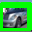

No objects detected


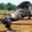

No objects detected


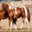

No objects detected


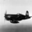

1/1 [==============================] - 0s 22ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 22ms/step
Detected object 2 is a ship


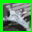

1/1 [==============================] - 0s 22ms/step
Detected object 1 is a ship


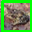

No objects detected


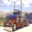

1/1 [==============================] - 0s 20ms/step
Detected object 1 is a ship
1/1 [==============================] - 0s 21ms/step
Detected object 2 is a dog


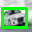

No objects detected


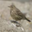

No objects detected


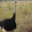

No objects detected


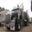

No objects detected


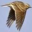

1/1 [==============================] - 0s 21ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 22ms/step
Detected object 2 is a truck


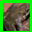

No objects detected


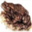

No objects detected


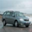

No objects detected


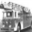

No objects detected


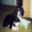

No objects detected


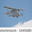

No objects detected


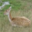

No objects detected


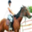

No objects detected


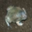

No objects detected


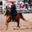

No objects detected


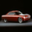

No objects detected


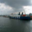

1/1 [==============================] - 0s 20ms/step
Detected object 1 is a automobile
1/1 [==============================] - 0s 22ms/step
Detected object 2 is a automobile


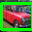

No objects detected


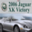

No objects detected


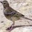

No objects detected


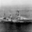

No objects detected


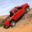

No objects detected


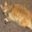

No objects detected


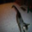

No objects detected


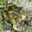

No objects detected


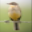

No objects detected


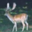

No objects detected


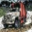

No objects detected


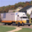

No objects detected


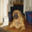

No objects detected


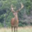

No objects detected


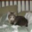

No objects detected


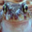

No objects detected


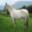

No objects detected


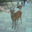

No objects detected


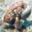

No objects detected


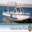

No objects detected


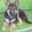

No objects detected


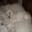

No objects detected


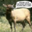

No objects detected


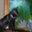

No objects detected


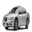

No objects detected


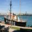

No objects detected


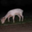

1/1 [==============================] - 0s 32ms/step
Detected object 1 is a airplane
1/1 [==============================] - 0s 35ms/step
Detected object 2 is a horse


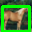

1/1 [==============================] - 0s 44ms/step
Detected object 1 is a cat
1/1 [==============================] - 0s 30ms/step
Detected object 2 is a cat


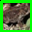

No objects detected


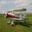

No objects detected


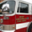

No objects detected


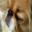

No objects detected


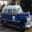

No objects detected


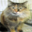

No objects detected


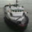

No objects detected


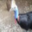

1/1 [==============================] - 0s 22ms/step
Detected object 1 is a horse
1/1 [==============================] - 0s 22ms/step
Detected object 2 is a horse
1/1 [==============================] - 0s 20ms/step
Detected object 3 is a horse
1/1 [==============================] - 0s 25ms/step
Detected object 4 is a horse
1/1 [==============================] - 0s 24ms/step
Detected object 5 is a horse
1/1 [==============================] - 0s 22ms/step
Detected object 6 is a horse
1/1 [==============================] - 0s 21ms/step
Detected object 7 is a horse
1/1 [==============================] - 0s 25ms/step
Detected object 8 is a horse
1/1 [==============================] - 0s 22ms/step
Detected object 9 is a horse
1/1 [==============================] - 0s 21ms/step
Detected object 10 is a horse


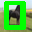

No objects detected


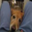

No objects detected


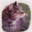

No objects detected


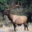

No objects detected


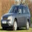

No objects detected


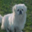

1/1 [==============================] - 0s 31ms/step
Detected object 1 is a truck
1/1 [==============================] - 0s 31ms/step
Detected object 2 is a dog


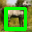

No objects detected


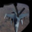

No objects detected


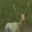

No objects detected


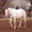

No objects detected


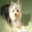

No objects detected


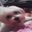

No objects detected


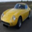

No objects detected


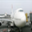

No objects detected


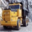

No objects detected


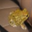

No objects detected


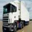

No objects detected


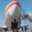

No objects detected


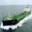

No objects detected


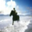

No objects detected


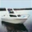

No objects detected


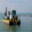

1/1 [==============================] - 0s 22ms/step
Detected object 1 is a airplane


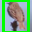

1/1 [==============================] - 0s 21ms/step
Detected object 1 is a ship


error: ignored

In [25]:
for i in range(len(x_train)):
    image = x_train[i]
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    image, detected_classes = detect_objects(image)
    cv2_imshow( image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

In [ ]:
#------------------------------------------------------------------------Detekcija objekata nad CIFAR10 datasetom-----------------------------------------------------------

In [26]:
import cv2
import numpy as np
from tensorflow.keras.datasets import cifar10

In [27]:
net = cv2.dnn.readNetFromDarknet('yolov4.cfg', 'yolov4.weights')

In [28]:
with open('cifar10_labels.txt', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

FileNotFoundError: ignored

* Ove linije koda učitavaju slike za testiranje iz skupa podataka CIFAR-10 i pretprocesiraju ih pretvaranjem tipa podataka u float32 i normaliziranjem vrijednosti piksela između 0 i 1. Ovaj korak pretprocesiranja često se izvodi prije unošenja slika u model strojnog učenja za bolja numerička stabilnost i konvergencija tijekom treninga ili testiranja.

In [29]:
(_, _), (X_test, _) = cifar10.load_data()
X_test = X_test.astype('float32') / 255.0

Ove linije koda izvode detekciju objekata na skupu slika provodeći ih kroz neuronsku mrežu, izdvajajući granične okvire i oznake klasa za otkrivene objekte, primjenjujući ne-maksimalno potiskivanje i vizualizirajući rezultate na slikama promijenjene veličine.

In [30]:
for image in X_test:
    resized_image = cv2.resize(image, (416, 416))

    blob = cv2.dnn.blobFromImage(resized_image, 1/255.0, (416, 416), swapRB=True, crop=False)

    net.setInput(blob)

    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * 416)
                center_y = int(detection[1] * 416)
                width = int(detection[2] * 416)
                height = int(detection[3] * 416)

                x = int(center_x - width / 2)
                y = int(center_y - height / 2)

                boxes.append([x, y, width, height])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    if len(indices) > 0:
        for i in indices.flatten():
            x, y, w, h = boxes[i]
            label = classes[class_ids[i]]
            confidence = confidences[i]

            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(resized_image, f'{label}: {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    cv2.imshow('Object Detection', resized_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

IndexError: ignored

In [31]:
total_objects = 0
detected_objects = 0

for image in X_test:
    resized_image = cv2.resize(image, (416, 416))

    blob = cv2.dnn.blobFromImage(resized_image, 1/255.0, (416, 416), swapRB=True, crop=False)

    net.setInput(blob)

    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * 416)
                center_y = int(detection[1] * 416)
                width = int(detection[2] * 416)
                height = int(detection[3] * 416)

                x = int(center_x - width / 2)
                y = int(center_y - height / 2)

                boxes.append([x, y, width, height])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    total_objects += len(boxes)

    if len(indices) > 0:
        detected_objects += len(indices)

accuracy = detected_objects / total_objects
missed_objects = total_objects - detected_objects

print(f"Total objects: {total_objects}")
print(f"Detected objects: {detected_objects}")
print(f"Missed objects: {missed_objects}")
print(f"Accuracy: {accuracy:.2%}")

IndexError: ignored

Dole navedene linije koda omogućuju praćenje i izvješćivanje o dodatnim informacijama kao što su ukupan broj objekata, broj otkrivenih objekata, broj propuštenih objekata i točnost sustava za otkrivanje i klasifikaciju objekata na testnom skupu.

In [32]:
total_objects = 0
detected_objects = 0
correct_classifications = 0

for image, label in zip(X_test, y_test):
    resized_image = cv2.resize(image, (416, 416))
    blob = cv2.dnn.blobFromImage(resized_image, 1/255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)
    layer_names = net.getLayerNames()
    output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
    outputs = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    for output in outputs:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]

            if confidence > 0.5:
                center_x = int(detection[0] * 416)
                center_y = int(detection[1] * 416)
                width = int(detection[2] * 416)
                height = int(detection[3] * 416)

                x = int(center_x - width / 2)
                y = int(center_y - height / 2)

                boxes.append([x, y, width, height])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    indices = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

    total_objects += len(boxes)

    if len(indices) > 0:
        detected_objects += len(indices)

        for i in indices.flatten():
            x, y, w, h = boxes[i]
            predicted_label = classes[class_ids[i]]
            confidence = confidences[i]

            cv2.rectangle(resized_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cv2.putText(resized_image, f'{predicted_label}: {confidence:.2f}', (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

        if predicted_label == label:
            correct_classifications += 1

    cv2.imshow('Object Detection', resized_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

missed_objects = total_objects - detected_objects
accuracy = correct_classifications / len(X_test)

print(f"Total objects: {total_objects}")
print(f"Detected objects: {detected_objects}")
print(f"Missed objects: {missed_objects}")
print(f"Accuracy: {accuracy:.2%}")

IndexError: ignored

In [33]:
from google.colab.patches import cv2_imshow

In [ ]:
#------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
#----------------------------------------------------------------Neuspijeli pokušaji-------------------------------------------------------------------------

In [ ]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers

In [ ]:
#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [ ]:
#x_train = x_train.astype("float32") / 255.0
#x_test = x_test.astype("float32") / 255.0

In [ ]:
#model = keras.Sequential(
  #  [
 #       keras.Input(shape=(32, 32, 3)),
   #     layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
    #    layers.MaxPooling2D(pool_size=(2, 2)),
     #   layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
      #  layers.MaxPooling2D(pool_size=(2, 2)),
       # layers.Flatten(),
     #   layers.Dropout(0.5),
   #     layers.Dense(10, activation="softmax"),
  #  ]
#)

In [ ]:
#model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
#model.fit(x_train, y_train, batch_size=64, epochs=10, validation_split=0.1)

In [ ]:
#model.evaluate(x_test, y_test)

In [ ]:
#img = keras.preprocessing.image.load_img('plane.jpg', target_size=(32, 32))
#img_array = keras.preprocessing.image.img_to_array(img)
#img_array = tf.expand_dims(img_array, 0)
#prediction = model.predict(img_array)
#class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'][prediction[0].argmax()]
#print('Image classified as:', class_name)

In [ ]:
#from tensorflow.keras.models import load_model

In [ ]:
#model_path = "Moj Disk/Colab Notebooks/my_model.h5"

In [ ]:
#model.save('/content/saved_model/mymodel.h5')

In [ ]:
#import cv2
#import numpy as np

In [ ]:
#classes = ["person", "bicycle", "car", "motorbike", "aeroplane", "bus", "train", "truck", "boat",
 #          "traffic light", "fire hydrant", "stop sign", "parking meter", "bench", "bird", "cat", "dog",
  #         "horse", "sheep", "cow", "elephant", "bear", "zebra", "giraffe", "backpack", "umbrella",
   #        "handbag", "tie", "suitcase", "frisbee", "skis", "snowboard", "sports ball", "kite",
    #       "baseball bat", "baseball glove", "skateboard", "surfboard", "tennis racket", "bottle",
     #      "wine glass", "cup", "fork", "knife", "spoon", "bowl", "banana", "apple", "sandwich",
      #     "orange", "broccoli", "carrot", "hot dog", "pizza", "donut", "cake", "chair", "sofa",
       #    "pottedplant", "bed", "diningtable", "toilet", "tvmonitor", "laptop", "mouse", "remote",
        #   "keyboard", "cell phone", "microwave", "oven", "toaster", "sink", "refrigerator", "book",
         #  "clock", "vase", "scissors", "teddy bear", "hair drier", "toothbrush"]

In [ ]:
#net = cv2.dnn.readNetFromDarknet("yolov4.cfg", "yolov4.weights")

In [ ]:
#image = cv2.imread('plane.jpg')

In [ ]:
#blob = cv2.dnn.blobFromImage(image, 1/255, (416, 416), swapRB=True, crop=False)
#net.setInput(blob)
#output_layers = net.getUnconnectedOutLayersNames()
#layer_outputs = net.forward(output_layers)
#boxes = []
#confidences = []
#class_ids = []

#for output in layer_outputs:
 #   for detection in output:
  #      scores = detection[5:]
   #     class_id = np.argmax(scores)
    #    confidence = scores[class_id]
     #   if confidence > 0.5 and class_id == 2:
      #      center_x = int(detection[0] * image.shape[1])
       #     center_y = int(detection[1] * image.shape[0])
        #    w = int(detection[2] * image.shape[1])
         #   h = int(detection[3] * image.shape[0])
      #      x = center_x - w // 2
       #     y = center_y - h // 2
        #    boxes.append([x, y, w, h])
         #   confidences.append(float(confidence))
          #  class_ids.append(class_id)

In [ ]:
#from google.colab.patches import cv2_imshow

In [ ]:
#cv2_imshow(image)
#cv2.waitKey(0)
